<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyRANDOM</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>RANDOM</b> <b style=color:red;>NUMBERS</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyRANDOM.png"></td>
</tr>
</table>

----
# `pyRANDOM`

pyRANDOM, a collection of jupyter notebooks playing with **random numbers** ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

----
# Random-number generator
In this notebook, we introduce **random-number generators**.

----
## Simple random rumber generator

We start with an old random-number generator, the **linear congruential generator** (LCG).

We define a **series** of numbers with the three large parameter values $a$, $b$, and $m$. 

We start with an **initial value** $x_0$, then the **series** follows as:
$$
\begin{array}{rcl}
x_0 &=& 0.1 \\
x_i &=& (a + x_{i-1}b) \mbox{ mod } m
\end{array}
$$

The largest number generated will be $m$, thus normalising the sequence to $m$ produces
random numbers between $r \in [0,1]$:
$$
r_i = \frac{x_i}{m}
$$

**Note:**
Here, `mod` is the **modulo operator** (in `python` the `%` sign), which defines the **remainder**
of a division $\frac{x}{n}$: 

In [2]:
x = 8
for n in range(1,x+1):
    print('x: ',x,' n: ',n,' x mod n: ',x%n)

x:  8  n:  1  x mod n:  0
x:  8  n:  2  x mod n:  0
x:  8  n:  3  x mod n:  2
x:  8  n:  4  x mod n:  0
x:  8  n:  5  x mod n:  3
x:  8  n:  6  x mod n:  2
x:  8  n:  7  x mod n:  1
x:  8  n:  8  x mod n:  0


In [18]:
def LCG(a,b,m,n=100,r0=0.1):
    """
    random-number generator
    linear congruential generator
    input: 
     a,b,m - large (!) integer
    output:
     r[n] - sequence of random numbers in [0,1]
    """
    r = np.array([r0])
    for i in range(1,n):
        r = np.append(r,(a+r[i-1]*b) % m)
    r = np.round(r/m,5)
    return r

In [19]:
def runLCG(a,b,m,n=100):
    """
    run and plot random data created with linear congruential generator
    """
    # call LCG generator
    r = LCG(a,b,m,n)
    # calculate mean and standard deviation
    mu    = r.mean()
    sigma = r.std()
    print(mu,sigma)
    # plot
    plt.figure(figsize=(10,4))
    plt.title('Linear congruential generator')
    plt.xlabel('No. of samples')
    plt.plot(r,lw=0,marker='o')
    plt.grid()
    return r,mu,sigma

Test with **small** numbers ...

0.29633180000000003 0.21240550963371926


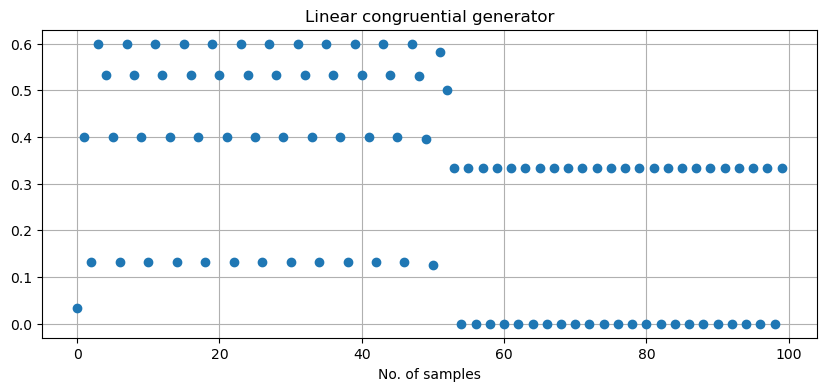

In [20]:
a=1.
b=2.
m=3.
r,mu,sigma = runLCG(a,b,m)

... not very impressive.

Test with **large** numbers ...

0.5453599 0.29217689492666943


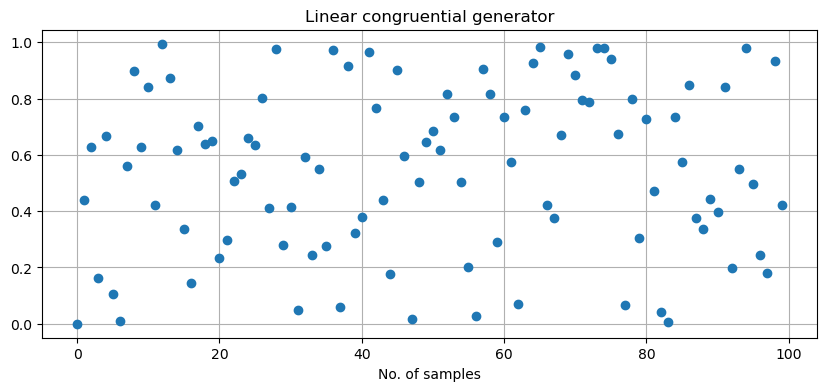

In [25]:
a = 1234567
b = 2345678
m = 3333333
r,mu,sigma = runLCG(a,b,m,n=100)

... better!

Plot the random values as histogram ...

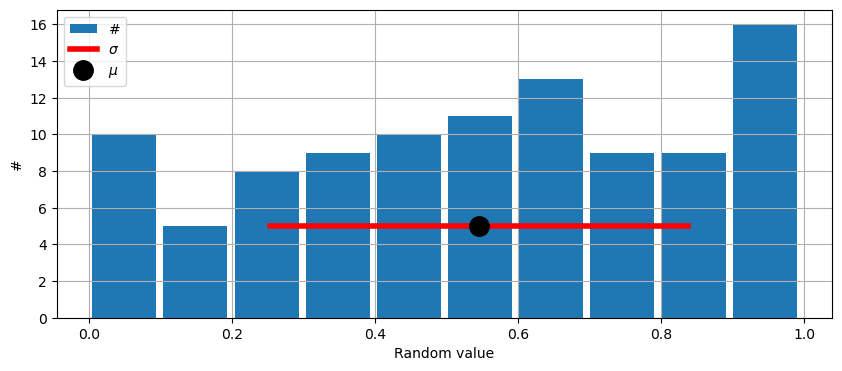

In [26]:
plt.figure(figsize=(10,4))
plt.xlabel('Random value')
plt.ylabel('#')
x,y,z=plt.hist(r,rwidth=0.9,label='#')
plt.plot([mu-sigma,mu+sigma],[5,5],lw=4,color='red',label='$\sigma$')
plt.plot(mu,5,lw=0,marker='o',markersize=14,color='black',label='$\mu$')
plt.legend()
plt.grid()

----
## Permutation congruential generator

The standard `numpy` implementation uses the **PCG-64**, which is a 128-bit implementation of O’Neill’s 
permutation congruential generator, see
[O'Neill, M. (2014): PCG: A Family of Simple Fast
Space-Efficient Statistically
Good Algorithms
for Random Number Generation, Harvard Mudd college](https://www.cs.hmc.edu/tr/hmc-cs-2014-0905.pdf)

It is initiated as **object**, either without argument, or using a **seed** value:

In [40]:
rng = np.random.default_rng(seed=42)
print(rng)

Generator(PCG64)


By defining a **seed** value, we are able to reproduce the random sequence, which might be useful in real-world runs.

We now test some of the many **distributions** the random-number generator offers.

### Uniform distribution
We start with a **uniform** distribution, using the `rng.uniform` function, and plot the data alongside with a histrogram:

In [28]:
def runPCGuniform(mu=0,sigma=1,n=100):
    """
    run and plot random data created with permutation congruential generator
    """
    r1 = rng.uniform(mu-sigma,mu+sigma,n)
    mu    = r1.mean()
    sigma = r1.std()
    print('mu: ',mu,' sigma: ',sigma)

    fig,axs = plt.subplots(1,2,figsize=(12,4))
    axs[0].set_title('Uniform distribution')
    axs[0].set_xlabel('No of samples')
    axs[0].set_ylabel('Random value')
    axs[0].plot(r1,lw=1,alpha=0.3,color=(0.2,0.2,0.2))
    axs[0].plot(r1,lw=0,marker='o',label='uniform')


    axs[1].set_xlabel('Random value')
    axs[1].set_ylabel('#')
    axs[1].hist(r1,bins=10,rwidth=0.9,label='#')
    return r1,mu,sigma

mu:  1.9706135560220557  sigma:  0.29707470105834666


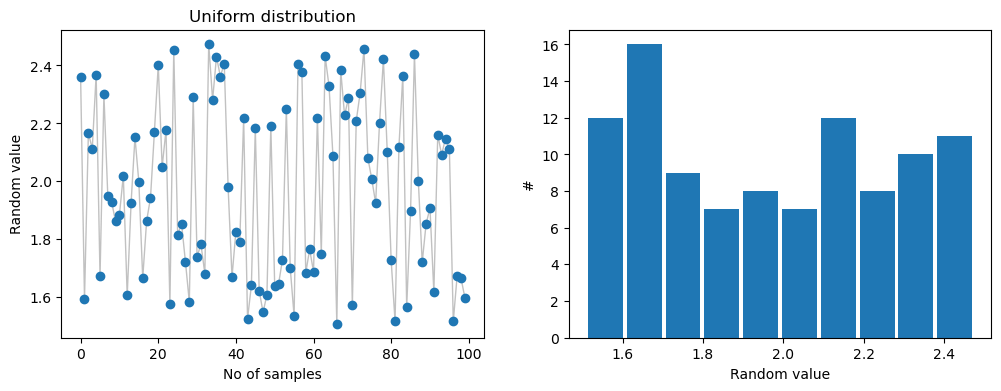

In [32]:
r1,mu,sigma = runPCGuniform(mu=2,sigma=0.5,n=100)

### Normal distribution
We start with a **normal** distribution, using the `rng.normal` function, and plot the data alongside with a histrogram:

In [33]:
def runPCGnormal(mu=0,sigma=1,n=100):
    """
    run and plot random data created with permutation congruential generator
    """
    r1 = rng.normal(mu,sigma,n)
    mu    = r1.mean()
    sigma = r1.std()
    print('mu: ',mu,' sigma: ',sigma)

    fig,axs = plt.subplots(1,2,figsize=(12,4))
    axs[0].set_title('Normal distribution')
    axs[0].set_xlabel('No of samples')
    axs[0].set_ylabel('Random value')
    axs[0].plot(r1,lw=1,alpha=0.3,color=(0.2,0.2,0.2))
    axs[0].plot(r1,lw=0,marker='o',label='uniform')


    axs[1].set_xlabel('Random value')
    axs[1].set_ylabel('#')
    axs[1].hist(r1,bins=10,rwidth=0.9,label='#')
    return r1,mu,sigma

mu:  1.9932176556785288  sigma:  0.48301575752875003


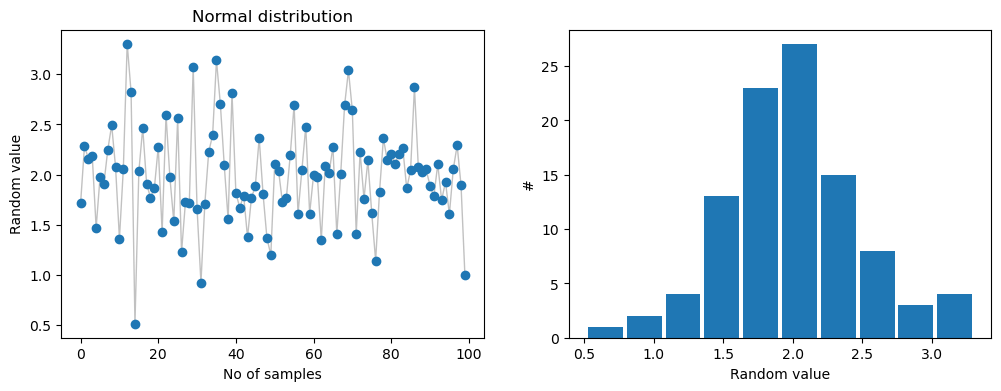

In [36]:
r1,mu,sigma = runPCGnormal(mu=2,sigma=0.5,n=100)

### Lognormal distribution
We start with a **lognormal** distribution, using the `rng.lognormal` function, and plot the data alongside with a histrogram:

In [37]:
def runPCGlognormal(mu=0,sigma=1,n=100):
    """
    run and plot random data created with permutation congruential generator
    """
    r1 = rng.lognormal(mu,sigma,n)
    mu    = r1.mean()
    sigma = r1.std()
    print('mu: ',mu,' sigma: ',sigma)

    fig,axs = plt.subplots(1,2,figsize=(12,4))
    axs[0].set_title('Log-normal distribution')
    axs[0].set_xlabel('No of samples')
    axs[0].set_ylabel('Random value')
    axs[0].plot(r1,lw=1,alpha=0.3,color=(0.2,0.2,0.2))
    axs[0].plot(r1,lw=0,marker='o',label='uniform')


    axs[1].set_xlabel('Random value')
    axs[1].set_ylabel('#')
    axs[1].hist(r1,bins=10,rwidth=0.9,label='#')
    return r1,mu,sigma

mu:  2.1723266472984135  sigma:  1.061631295776298


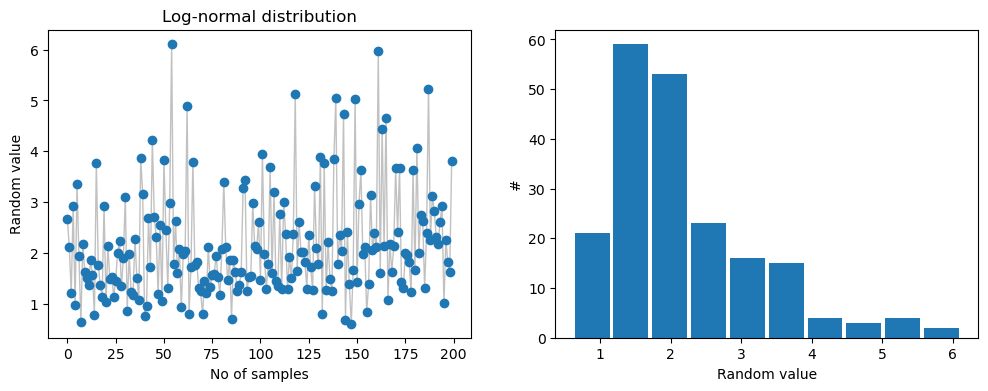

In [38]:
r1,mu,sigma = runPCGlognormal(mu=0.69,sigma=0.5,n=200)

----
### Shuffle

In [39]:
text = 'Random-number generator'
string = []
for i in range(len(text)):
    string.append(text[i])

print('Original text:')
for i in range(len(string)):
    print(string[i],end='')
    
rng.shuffle(string) 

print('\nShuffled text:')
for i in range(len(string)):
    print(string[i],end='')

Original text:
Random-number generator
Shuffled text:
deo ernngRuntme-bmararo

In [ ]:
n = 100
r1 = rng.uniform(0,1,n)
r2 = rng.normal(0.5,0.1,n)
r3 = rng.lognormal(-0.69,0.1,n)

plt.figure(figsize=(10,6))
plt.xlabel('No of samples')
plt.ylabel('Random value')
plt.plot(r1,lw=2,label='uniform')
plt.plot(r2,lw=2,label='normal')
plt.plot(r3,lw=2,label='lognormal')
plt.legend()
plt.grid()

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation

s = np.random.default_rng(seed=12).normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')